In [2]:
import vaex
import numpy as np
import matplotlib.pyplot as plt
from os.path import join, abspath
from os import pardir, mkdir
import corner
from operator import itemgetter
import time
import sys
from scipy.interpolate import interp1d
from scipy.stats import norm, uniform

In [23]:
# import utils
util_dir = abspath(pardir)
sys.path.insert(0, util_dir)
from utils import log_nu_mod

In [4]:
root_data_dir = abspath(join(pardir, "Data"))
root_data_dir

'/home2/s20321005/Thesis-Project/Data'

In [16]:
data_baryon_dir = join(root_data_dir, "Baryon")
data_number_dir = join(root_data_dir, "Number-Density")
data_velocity_dir = join(root_data_dir, "Spectral-Class-Velocity")
data_comp_dir = join(root_data_dir, "Effective-Volume")

In [5]:
data_dir_mcmc = join(root_data_dir, "MCMC")

In [18]:
tipe = "F"

df_number = vaex.open(join(data_number_dir, f"cum-{tipe}.hdf5"))
df_velocity = vaex.open(join(data_velocity_dir, f"{tipe}-type.hdf5"))
df_comp = vaex.open(join(data_comp_dir, "comp.hdf5"))

z = df_number.z.to_numpy()
comp = df_comp[tipe].to_numpy()
zs = df_comp.z.to_numpy()
compz = interp1d(zs, comp, kind='cubic', fill_value='extrapolate')
ze = np.linspace(-0.2, 0.2, 31)
zs = (ze[:-1]+ze[1:])/2

znum, _ = np.histogram(z, bins=ze)
znum = znum/compz(zs)
zerr = np.sqrt(znum)
znum, zerr = znum/(ze[1]-ze[0]), zerr/(ze[1]-ze[0])

index = []
for i, hh in enumerate(znum):
    if hh == 0:
        index.append(i)
znum, zerr, zs = np.delete(znum, index), np.delete(zerr, index), np.delete(zs, index)

w = df_velocity.w.to_numpy()
we = np.linspace(-50, 50, 51)
ws = (we[:-1]+we[1:])/2

wnum, _ = np.histogram(w, bins=we)
werr = np.sqrt(wnum)
wnum, werr = wnum/(we[1]-we[0]), werr/(we[1]-we[0])

index = []
for i, hh in enumerate(wnum):
    if hh == 0:
        index.append(i)
wnum, werr, ws = np.delete(wnum, index), np.delete(werr, index), np.delete(ws, index)

print(len(w))

1625


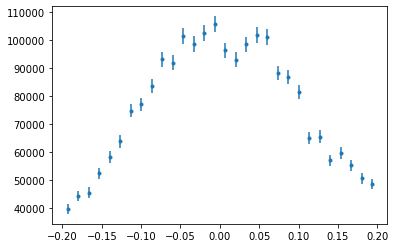

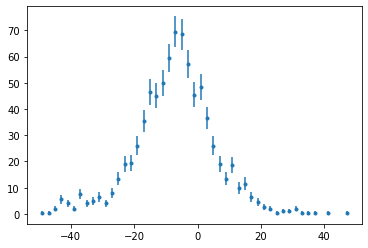

In [19]:
plt.errorbar(zs, znum, yerr=zerr, fmt=".")
plt.show()
plt.errorbar(ws, wnum, yerr=werr, fmt=".")
plt.show()

In [20]:
data = dict(w=dict(wnum=wnum, ws=ws, werr=werr), z=dict(znum=znum, zs=zs, zerr=zerr))

# DD + DM

In [36]:
df = vaex.open(join(data_dir_mcmc, "mcmc-F-tesDD.hdf5"))
df['rhob'] = df.evaluate('rho1+rho2+rho3+rho4+rho5+rho6+rho7+rho8+rho9+rho10+rho11+rho12')
df = df.extract()
df

#,rho1,rho2,rho3,rho4,rho5,rho6,rho7,rho8,rho9,rho10,rho11,rho12,sigmaz1,sigmaz2,sigmaz3,sigmaz4,sigmaz5,sigmaz6,sigmaz7,sigmaz8,sigmaz9,sigmaz10,sigmaz11,sigmaz12,rhoDM,sigmaDD,hDD,Nu0,zsun,R,sigma_w,w0,N0,walker,rhob
0,0.016229346215210716,0.01567521253321056,0.0077340910755706194,0.00047266604051463413,0.0005593696310442109,0.0017850336469139166,0.0027289044412954428,0.002842484707337039,0.006225514794957057,0.023534040728105263,0.0034940649022881754,0.0016249035472344323,3.1296696691421375,6.677507343541446,30.135298652828254,43.5621602036213,11.98286694549962,13.304691227004923,6.824818533863704,25.668730288619223,18.33793727334304,24.030665707038434,33.70771488633342,15.79958065287306,0.1417535910244267,61.17194665622959,88.95447416712538,99073.51911782002,0.01075035984974368,0.0021928465887679793,19.78326104045776,-5.7338543979329595,1512.0407479628711,0,0.08290563226368208
1,0.016229346215210716,0.01567521253321056,0.0077340910755706194,0.00047266604051463413,0.0005593696310442109,0.0017850336469139166,0.0027289044412954428,0.002842484707337039,0.006225514794957057,0.023534040728105263,0.0034940649022881754,0.0016249035472344323,3.1296696691421375,6.677507343541446,30.135298652828254,43.5621602036213,11.98286694549962,13.304691227004923,6.824818533863704,25.668730288619223,18.33793727334304,24.030665707038434,33.70771488633342,15.79958065287306,0.1417535910244267,61.17194665622959,88.95447416712538,99073.51911782002,0.01075035984974368,0.0021928465887679793,19.78326104045776,-5.7338543979329595,1512.0407479628711,0,0.08290563226368208
2,0.016229346215210716,0.01567521253321056,0.0077340910755706194,0.00047266604051463413,0.0005593696310442109,0.0017850336469139166,0.0027289044412954428,0.002842484707337039,0.006225514794957057,0.023534040728105263,0.0034940649022881754,0.0016249035472344323,3.1296696691421375,6.677507343541446,30.135298652828254,43.5621602036213,11.98286694549962,13.304691227004923,6.824818533863704,25.668730288619223,18.33793727334304,24.030665707038434,33.70771488633342,15.79958065287306,0.1417535910244267,61.17194665622959,88.95447416712538,99073.51911782002,0.01075035984974368,0.0021928465887679793,19.78326104045776,-5.7338543979329595,1512.0407479628711,0,0.08290563226368208
3,0.014013951097706008,0.020699760162908615,0.007562106313758852,0.000481057549225902,0.0005804715235926171,0.0017914372656608057,0.0023612182837613282,0.0028273712237337216,0.00651077441653577,0.02255057853349816,0.004405727877248371,0.0016034321522970323,3.3428841301200327,6.899087986348679,27.2259537681067,42.67904146734862,13.066938555935382,11.47466528095421,8.508163292620997,22.769999905906445,18.542937477013094,22.560552279191153,26.752587635618426,17.7046438062897,0.11948005338683615,55.11357443821185,76.8560166290951,101282.60799402544,0.008063507922828998,0.0025131935867563015,16.731032351137515,-4.508225285074148,1438.5729567856317,0,0.08538788639992718
4,0.014013951097706008,0.020699760162908615,0.007562106313758852,0.000481057549225902,0.0005804715235926171,0.0017914372656608057,0.0023612182837613282,0.0028273712237337216,0.00651077441653577,0.02255057853349816,0.004405727877248371,0.0016034321522970323,3.3428841301200327,6.899087986348679,27.2259537681067,42.67904146734862,13.066938555935382,11.47466528095421,8.508163292620997,22.769999905906445,18.542937477013094,22.560552279191153,26.752587635618426,17.7046438062897,0.11948005338683615,55.11357443821185,76.8560166290951,101282.60799402544,0.008063507922828998,0.0025131935867563015,16.731032351137515,-4.508225285074148,1438.5729567856317,0,0.08538788639992718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,0.011418537273094198,0.040010368696592066,0.00840523476869115,0.0005007267504207413,0.0006070227742163743,0.0018252035468697522,0.0017380923022559042,0.0032159026670565247,0.00684085326274598,0.02338291773819252,0.005921592361776691,0.0009433032598570616,3.84101

In [8]:
walker = df.take([-1]).walker.to_numpy()[0]+1
walker

99

In [9]:
len(df)//walker

10

In [10]:
# rhos = np.zeros((len(df)//walker, walker, 12))
rhos = np.zeros((12, len(df)))
# for i in range(walker):    
    # rhos[:, i, 0] = df.filter(df.walker == i)['rho1'].to_numpy()
    # rhos[:, i, 1] = df.filter(df.walker == i)['rho2'].to_numpy()
    # rhos[:, i, 2] = df.filter(df.walker == i)['rho3'].to_numpy()
    # rhos[:, i, 3] = df.filter(df.walker == i)['rho4'].to_numpy()
    # rhos[:, i, 4] = df.filter(df.walker == i)['rho5'].to_numpy()
    # rhos[:, i, 5] = df.filter(df.walker == i)['rho6'].to_numpy()
    # rhos[:, i, 6] = df.filter(df.walker == i)['rho7'].to_numpy()
    # rhos[:, i, 7] = df.filter(df.walker == i)['rho8'].to_numpy()
    # rhos[:, i, 8] = df.filter(df.walker == i)['rho9'].to_numpy()
    # rhos[:, i, 9] = df.filter(df.walker == i)['rho10'].to_numpy()
    # rhos[:, i, 10] = df.filter(df.walker == i)['rho11'].to_numpy()
    # rhos[:, i, 11] = df.filter(df.walker == i)['rho12'].to_numpy()
rhos[0] = df['rho1'].to_numpy()
rhos[1] = df['rho2'].to_numpy()
rhos[2] = df['rho3'].to_numpy()
rhos[3] = df['rho4'].to_numpy()
rhos[4] = df['rho5'].to_numpy()
rhos[5] = df['rho6'].to_numpy()
rhos[6] = df['rho7'].to_numpy()
rhos[7] = df['rho8'].to_numpy()
rhos[8] = df['rho9'].to_numpy()
rhos[9] = df['rho10'].to_numpy()
rhos[10] = df['rho11'].to_numpy()
rhos[11] = df['rho12'].to_numpy()
rhos

array([[0.00921966, 0.00919225, 0.00919225, ..., 0.00859209, 0.00859209,
        0.00859209],
       [0.03209994, 0.03211584, 0.03211584, ..., 0.02615792, 0.02615792,
        0.02615792],
       [0.0068687 , 0.00687206, 0.00687206, ..., 0.00663846, 0.00663846,
        0.00663846],
       ...,
       [0.02147832, 0.02145759, 0.02145759, ..., 0.02182029, 0.02182029,
        0.02182029],
       [0.00523563, 0.00524405, 0.00524405, ..., 0.00545808, 0.00545808,
        0.00545808],
       [0.00170072, 0.001704  , 0.001704  , ..., 0.00163258, 0.00163258,
        0.00163258]])

In [11]:
# sigmaz = np.zeros((len(df)//walker, walker, 12))
sigmaz = np.zeros((12, len(df)))
# for i in range(walker):    
#     sigmaz[:, i, 0] = df.filter(df.walker == i)['sigmaz1'].to_numpy()
#     sigmaz[:, i, 1] = df.filter(df.walker == i)['sigmaz2'].to_numpy()
#     sigmaz[:, i, 2] = df.filter(df.walker == i)['sigmaz3'].to_numpy()
#     sigmaz[:, i, 3] = df.filter(df.walker == i)['sigmaz4'].to_numpy()
#     sigmaz[:, i, 4] = df.filter(df.walker == i)['sigmaz5'].to_numpy()
#     sigmaz[:, i, 5] = df.filter(df.walker == i)['sigmaz6'].to_numpy()
#     sigmaz[:, i, 6] = df.filter(df.walker == i)['sigmaz7'].to_numpy()
#     sigmaz[:, i, 7] = df.filter(df.walker == i)['sigmaz8'].to_numpy()
#     sigmaz[:, i, 8] = df.filter(df.walker == i)['sigmaz9'].to_numpy()
#     sigmaz[:, i, 9] = df.filter(df.walker == i)['sigmaz10'].to_numpy()
#     sigmaz[:, i, 10] = df.filter(df.walker == i)['sigmaz11'].to_numpy()
#     sigmaz[:, i, 11] = df.filter(df.walker == i)['sigmaz12'].to_numpy()
sigmaz[0] = df['sigmaz1'].to_numpy()
sigmaz[1] = df['sigmaz2'].to_numpy()
sigmaz[2] = df['sigmaz3'].to_numpy()
sigmaz[3] = df['sigmaz4'].to_numpy()
sigmaz[4] = df['sigmaz5'].to_numpy()
sigmaz[5] = df['sigmaz6'].to_numpy()
sigmaz[6] = df['sigmaz7'].to_numpy()
sigmaz[7] = df['sigmaz8'].to_numpy()
sigmaz[8] = df['sigmaz9'].to_numpy()
sigmaz[9] = df['sigmaz10'].to_numpy()
sigmaz[10] = df['sigmaz11'].to_numpy()
sigmaz[11] = df['sigmaz12'].to_numpy()
sigmaz

array([[ 3.7609228 ,  3.76204531,  3.76204531, ...,  3.54948709,
         3.54948709,  3.54948709],
       [ 5.96931697,  5.98916182,  5.98916182, ...,  7.3923815 ,
         7.3923815 ,  7.3923815 ],
       [21.65072081, 21.68272778, 21.68272778, ..., 23.37798157,
        23.37798157, 23.37798157],
       ...,
       [21.9161375 , 21.85957424, 21.85957424, ..., 13.26273121,
        13.26273121, 13.26273121],
       [25.96440345, 25.96727764, 25.96727764, ..., 19.52047131,
        19.52047131, 19.52047131],
       [16.33628681, 16.31768744, 16.31768744, ..., 23.29864993,
        23.29864993, 23.29864993]])

In [12]:
chain = np.zeros((len(df)//walker, walker, 10))

pars = ["rhoDM", "sigmaDD", 'hDD', "Nu0", 'zsun', 'R', 'sigma_w', 'w0', 'N0', 'rhob']
for j in range(walker):
    for i, key in enumerate(pars):
        chain[:, j, i] = df.filter(df.walker == j)[key].to_numpy()

In [13]:
def plot_chain(samples, labels, skip=0, alpha=0.3):
    fig, axes = plt.subplots(len(labels), figsize=(10, 7), sharex=True)
    for i in range(len(labels)):
        ax = axes[i]
        ax.plot(samples[:, :, skip+i], "k", alpha=alpha)
        ax.set_xlim(0, len(samples))
        ax.set_ylabel(labels[i])
        ax.yaxis.set_label_coords(-0.1, 0.5)
    axes[-1].set_xlabel("step number")
def plot_corners(flat_samples, labels, skip=0, **kwargs):
    ks = dict(
        labels=labels,
        quantiles=[0.16, 0.5, 0.84],
        show_titles=True, 
        title_kwargs={"fontsize": 12},
        title_fmt = '.3f'
    )
    if 'truths' in kwargs:
        ks['truths'] = kwargs['truths']
    fig = corner.corner(flat_samples[:, skip:], **ks)

In [14]:
flat_samples = chain.reshape(len(df),10)
flat_samples.shape

(990, 10)

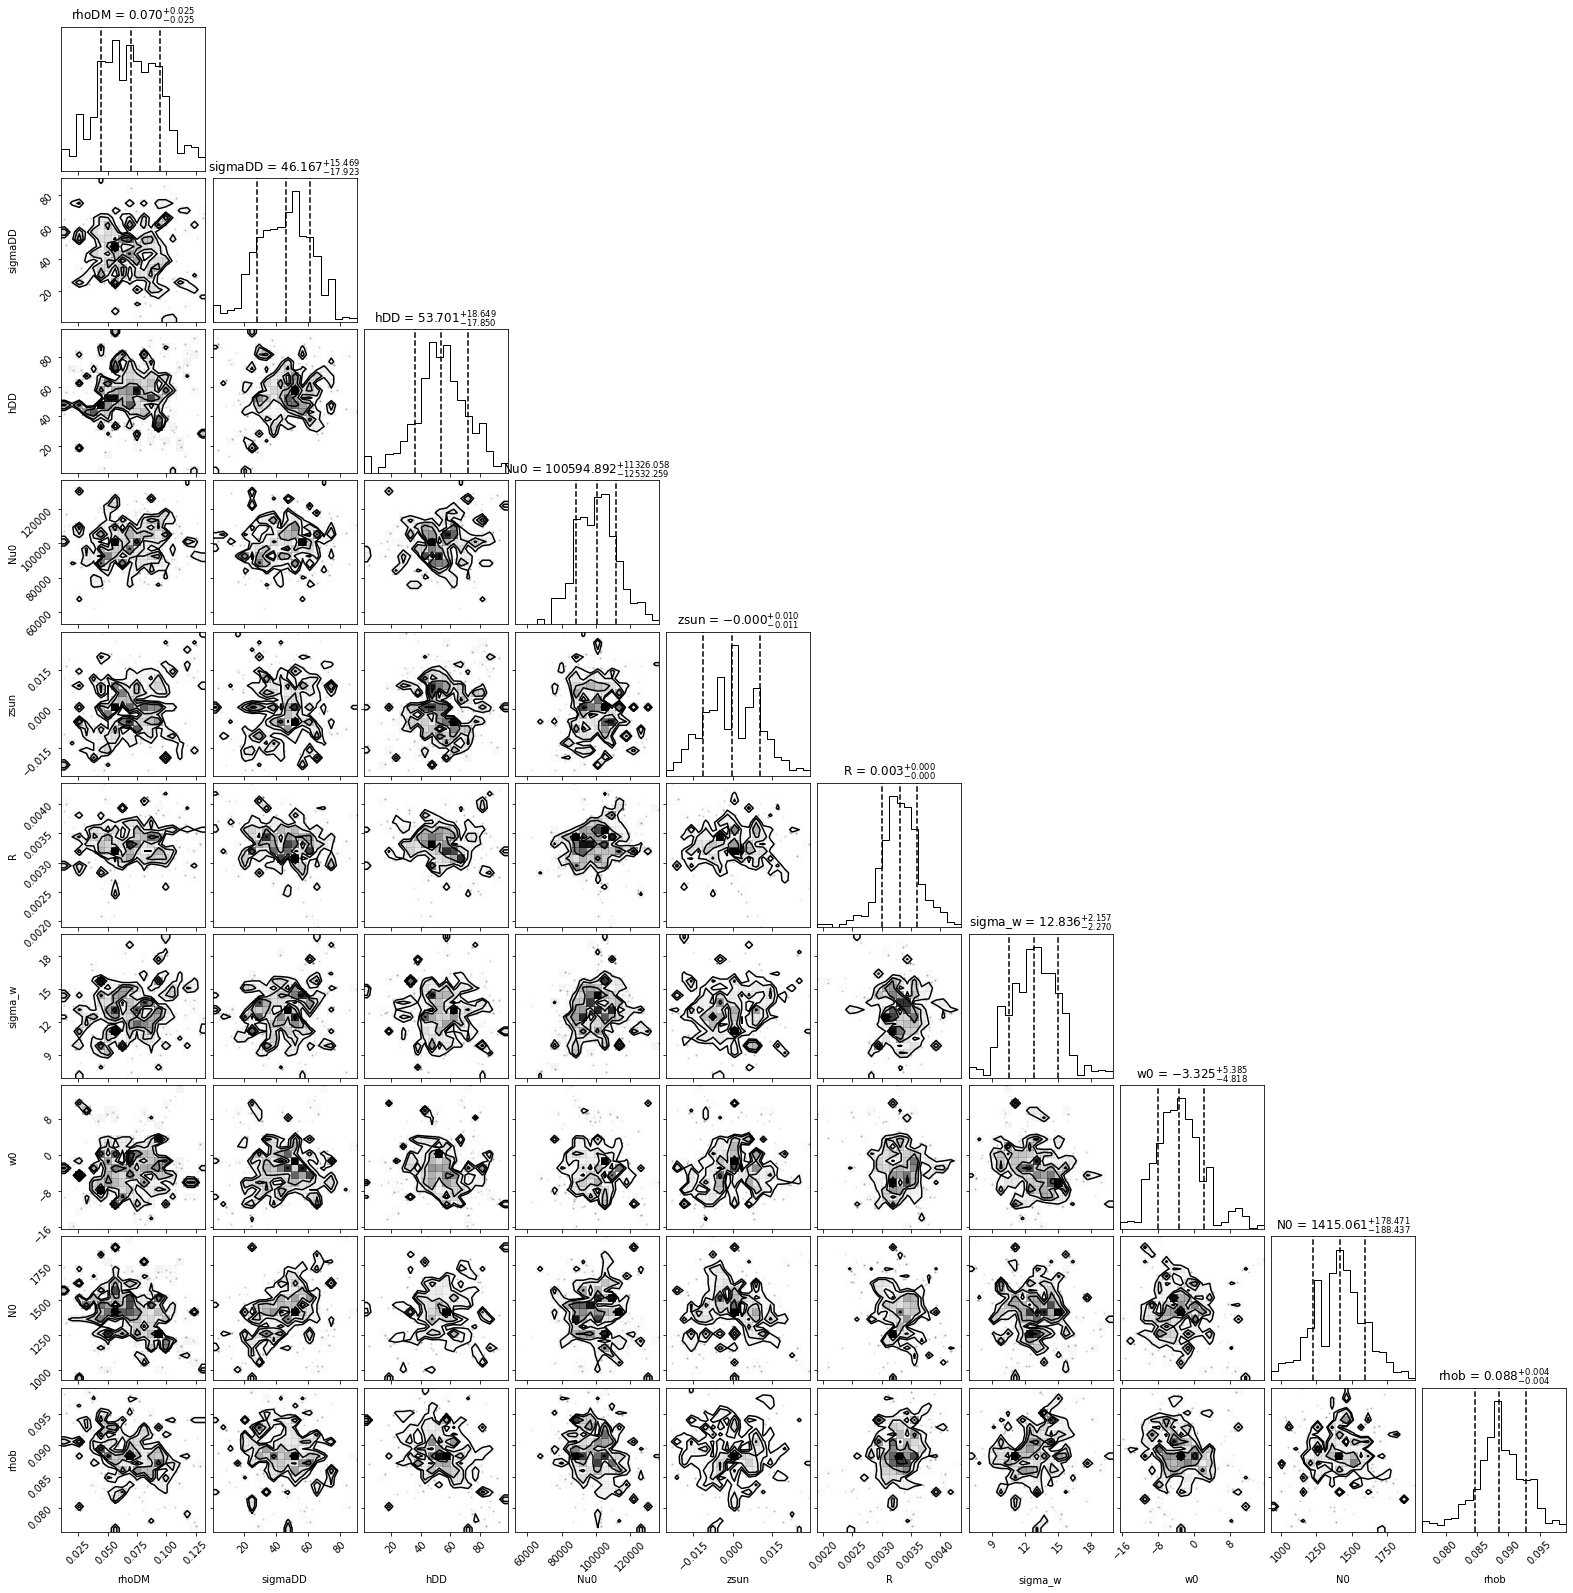

In [15]:
plot_corners(flat_samples, pars, skip=0)

In [21]:
model = dict(
    rhoDM=flat_samples[:, 0],
    sigmaDD=flat_samples[:, 1],
    hDD=flat_samples[:, 2],
    Nu0=flat_samples[:, 3],
    zsun=flat_samples[:, 4],
    R=flat_samples[:, 5],
    sigma_w=flat_samples[:, 6],
    w0=flat_samples[:, 7],
    N0=flat_samples[:, 8]
)
total = len(flat_samples[:, 0])

theta = dict(
    rhos=rhos[:, -1],
    sigmaz=sigmaz[:, -1],
    rhoDM=flat_samples[-1, 0],
    sigmaDD=flat_samples[-1, 1],
    hDD=flat_samples[-1, 2],
    Nu0=flat_samples[-1, 3],
    zsun=flat_samples[-1, 4],
    R=flat_samples[-1, 5],
    sigma_w=flat_samples[-1, 6],
    w0=flat_samples[-1, 7],
    N0=flat_samples[-1, 8]
)

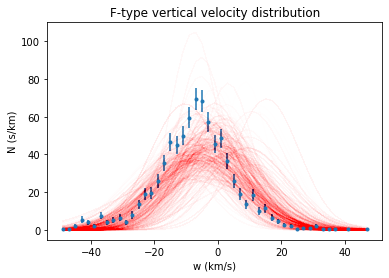

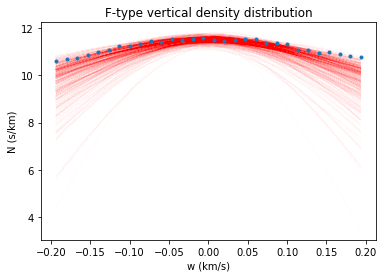

In [24]:
z, w = itemgetter('z','w')(data)

args = ('ws', 'wnum', 'werr')
ws, wnum, werr = itemgetter(*args)(w)

plt.figure()
plt.title("F-type vertical velocity distribution")
log_N = lambda x, t: t['N0']*norm.pdf(x, loc=t['w0'], scale=t['sigma_w'])

for i in range(2000):
    index = int(np.random.random()*total)
    for k, v in model.items():
        theta[k] = v[index]
    logN = log_N(ws, theta)
    plt.plot(ws, logN, c="red", alpha=0.002)
plt.errorbar(ws, wnum, yerr=werr, fmt='.')
plt.xlabel("w (km/s)")
plt.ylabel("N (s/km)")
plt.show()

args = ('zs', 'znum', 'zerr')
zs, znum, zerr = itemgetter(*args)(z)

logNu_ = lambda x, t: log_nu_mod(x, t)+np.log(compz(x))

plt.figure()
plt.title("F-type vertical density distribution")
for i in range(2000):
    index = int(np.random.random()*total)
    for k, v in model.items():
        if k in ["rhos", "sigmaz"]:
            theta[k] = v[:, index]
        else:
            theta[k] = v[index]
    logNu = log_nu_mod(zs, theta)
    plt.plot(zs, logNu, c="red", alpha=0.002)
plt.errorbar(zs, np.log(znum), yerr=[-np.log(1-zerr/znum), np.log(1+zerr/znum)], fmt='.')
plt.xlabel("z (kpc)")
plt.ylabel("N")
plt.show()

# DM halo Only

In [37]:
df = vaex.open(join(data_dir_mcmc, "mcmc-F-tesDM.hdf5"))
df['rhob'] = df.evaluate('rho1+rho2+rho3+rho4+rho5+rho6+rho7+rho8+rho9+rho10+rho11+rho12')
df = df.extract()
df

#,rho1,rho2,rho3,rho4,rho5,rho6,rho7,rho8,rho9,rho10,rho11,rho12,sigmaz1,sigmaz2,sigmaz3,sigmaz4,sigmaz5,sigmaz6,sigmaz7,sigmaz8,sigmaz9,sigmaz10,sigmaz11,sigmaz12,rhoDM,Nu0,zsun,R,sigma_w,w0,N0,walker,rhob
0,0.011570893854604337,0.03228379758784822,0.007561312056575298,0.00048827286077359286,0.0005639415873556536,0.0017852959375048445,0.0019024018370196198,0.003100153765441096,0.006977880396045603,0.02466038413641997,0.005901293542681354,0.0014246901810863338,3.713729615104736,7.115999618297769,22.054402108592395,37.59335206109274,15.724407134676067,6.632933268463391,13.196992199802825,18.454160200024315,18.321659431046367,17.960267732103212,22.228613639534657,17.70885392891513,0.07741039205468503,108417.11552826232,-0.0014727983551990915,0.0035893894742250326,10.424956398717105,-1.3497408408578417,1555.3056963095112,0,0.09822031774335592
1,0.011570893854604337,0.03228379758784822,0.007561312056575298,0.00048827286077359286,0.0005639415873556536,0.0017852959375048445,0.0019024018370196198,0.003100153765441096,0.006977880396045603,0.02466038413641997,0.005901293542681354,0.0014246901810863338,3.713729615104736,7.115999618297769,22.054402108592395,37.59335206109274,15.724407134676067,6.632933268463391,13.196992199802825,18.454160200024315,18.321659431046367,17.960267732103212,22.228613639534657,17.70885392891513,0.07741039205468503,108417.11552826232,-0.0014727983551990915,0.0035893894742250326,10.424956398717105,-1.3497408408578417,1555.3056963095112,0,0.09822031774335592
2,0.011570893854604337,0.03228379758784822,0.007561312056575298,0.00048827286077359286,0.0005639415873556536,0.0017852959375048445,0.0019024018370196198,0.003100153765441096,0.006977880396045603,0.02466038413641997,0.005901293542681354,0.0014246901810863338,3.713729615104736,7.115999618297769,22.054402108592395,37.59335206109274,15.724407134676067,6.632933268463391,13.196992199802825,18.454160200024315,18.321659431046367,17.960267732103212,22.228613639534657,17.70885392891513,0.07741039205468503,108417.11552826232,-0.0014727983551990915,0.0035893894742250326,10.424956398717105,-1.3497408408578417,1555.3056963095112,0,0.09822031774335592
3,0.011570893854604337,0.03228379758784822,0.007561312056575298,0.00048827286077359286,0.0005639415873556536,0.0017852959375048445,0.0019024018370196198,0.003100153765441096,0.006977880396045603,0.02466038413641997,0.005901293542681354,0.0014246901810863338,3.713729615104736,7.115999618297769,22.054402108592395,37.59335206109274,15.724407134676067,6.632933268463391,13.196992199802825,18.454160200024315,18.321659431046367,17.960267732103212,22.228613639534657,17.70885392891513,0.07741039205468503,108417.11552826232,-0.0014727983551990915,0.0035893894742250326,10.424956398717105,-1.3497408408578417,1555.3056963095112,0,0.09822031774335592
4,0.011570893854604337,0.03228379758784822,0.007561312056575298,0.00048827286077359286,0.0005639415873556536,0.0017852959375048445,0.0019024018370196198,0.003100153765441096,0.006977880396045603,0.02466038413641997,0.005901293542681354,0.0014246901810863338,3.713729615104736,7.115999618297769,22.054402108592395,37.59335206109274,15.724407134676067,6.632933268463391,13.196992199802825,18.454160200024315,18.321659431046367,17.960267732103212,22.228613639534657,17.70885392891513,0.07741039205468503,108417.11552826232,-0.0014727983551990915,0.0035893894742250326,10.424956398717105,-1.3497408408578417,1555.3056963095112,0,0.09822031774335592
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
925,0.011248017316070617,0.02742672178988511,0.007382467177916535,0.0004937508085068151,0.0005820784700324034,0.0017894162292559628,0.001792204668430122,0.0028980770318112947,0.007060917608983357,0.02276069465035524,0.005896135750395632,0.001413489099195669,3.647993710470893,7.135425806878058,21.610972278964645,37.697790243445425,15.140370052238634,7.8992840962624715,13.488543323651033,18.034620266862504,17.545970989489362,18.55

In [38]:
walker = df.take([-1]).walker.to_numpy()[0]+1
walker

93

In [39]:
len(df)//walker

10

In [40]:
# rhos = np.zeros((len(df)//walker, walker, 12))
rhos = np.zeros((12, len(df)))
rhos[0] = df['rho1'].to_numpy()
rhos[1] = df['rho2'].to_numpy()
rhos[2] = df['rho3'].to_numpy()
rhos[3] = df['rho4'].to_numpy()
rhos[4] = df['rho5'].to_numpy()
rhos[5] = df['rho6'].to_numpy()
rhos[6] = df['rho7'].to_numpy()
rhos[7] = df['rho8'].to_numpy()
rhos[8] = df['rho9'].to_numpy()
rhos[9] = df['rho10'].to_numpy()
rhos[10] = df['rho11'].to_numpy()
rhos[11] = df['rho12'].to_numpy()
rhos

array([[0.01157089, 0.01157089, 0.01157089, ..., 0.01165062, 0.0112778 ,
        0.01120507],
       [0.0322838 , 0.0322838 , 0.0322838 , ..., 0.02185172, 0.01979301,
        0.01785862],
       [0.00756131, 0.00756131, 0.00756131, ..., 0.00731819, 0.00714688,
        0.00706564],
       ...,
       [0.02466038, 0.02466038, 0.02466038, ..., 0.02296278, 0.02351321,
        0.02396   ],
       [0.00590129, 0.00590129, 0.00590129, ..., 0.00532077, 0.00470948,
        0.00451103],
       [0.00142469, 0.00142469, 0.00142469, ..., 0.00133334, 0.0012489 ,
        0.00116052]])

In [41]:
#sigmaz = np.zeros((len(df)//walker, walker, 12))
sigmaz = np.zeros((12, len(df)))
sigmaz[0] = df['sigmaz1'].to_numpy()
sigmaz[1] = df['sigmaz2'].to_numpy()
sigmaz[2] = df['sigmaz3'].to_numpy()
sigmaz[3] = df['sigmaz4'].to_numpy()
sigmaz[4] = df['sigmaz5'].to_numpy()
sigmaz[5] = df['sigmaz6'].to_numpy()
sigmaz[6] = df['sigmaz7'].to_numpy()
sigmaz[7] = df['sigmaz8'].to_numpy()
sigmaz[8] = df['sigmaz9'].to_numpy()
sigmaz[9] = df['sigmaz10'].to_numpy()
sigmaz[10] = df['sigmaz11'].to_numpy()
sigmaz[11] = df['sigmaz12'].to_numpy()
sigmaz

array([[ 3.71372962,  3.71372962,  3.71372962, ...,  3.464301  ,
         3.30770185,  3.236306  ],
       [ 7.11599962,  7.11599962,  7.11599962, ...,  7.25198638,
         7.32646812,  7.38282926],
       [22.05440211, 22.05440211, 22.05440211, ..., 21.13609804,
        21.9343222 , 21.806902  ],
       ...,
       [17.96026773, 17.96026773, 17.96026773, ..., 17.55940128,
        16.04348168, 15.6439761 ],
       [22.22861364, 22.22861364, 22.22861364, ..., 20.35421945,
        19.47266963, 19.47877133],
       [17.70885393, 17.70885393, 17.70885393, ..., 19.54081171,
        19.74939254, 18.8873182 ]])

In [42]:
chain = np.zeros((len(df)//walker, walker, 8))

pars = ["rhoDM", "Nu0", 'zsun', 'R', 'sigma_w', 'w0', 'N0', 'rhob']
for j in range(walker):
    for i, key in enumerate(pars):
        chain[:, j, i] = df.filter(df.walker == j)[key].to_numpy()

flat_samples_DM = chain.reshape(len(df),8)
flat_samples_DM.shape

(930, 8)

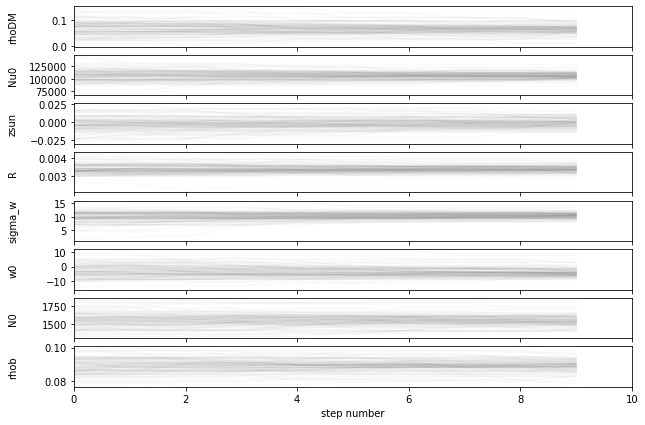

In [43]:
plot_chain(chain, pars, alpha=0.02)

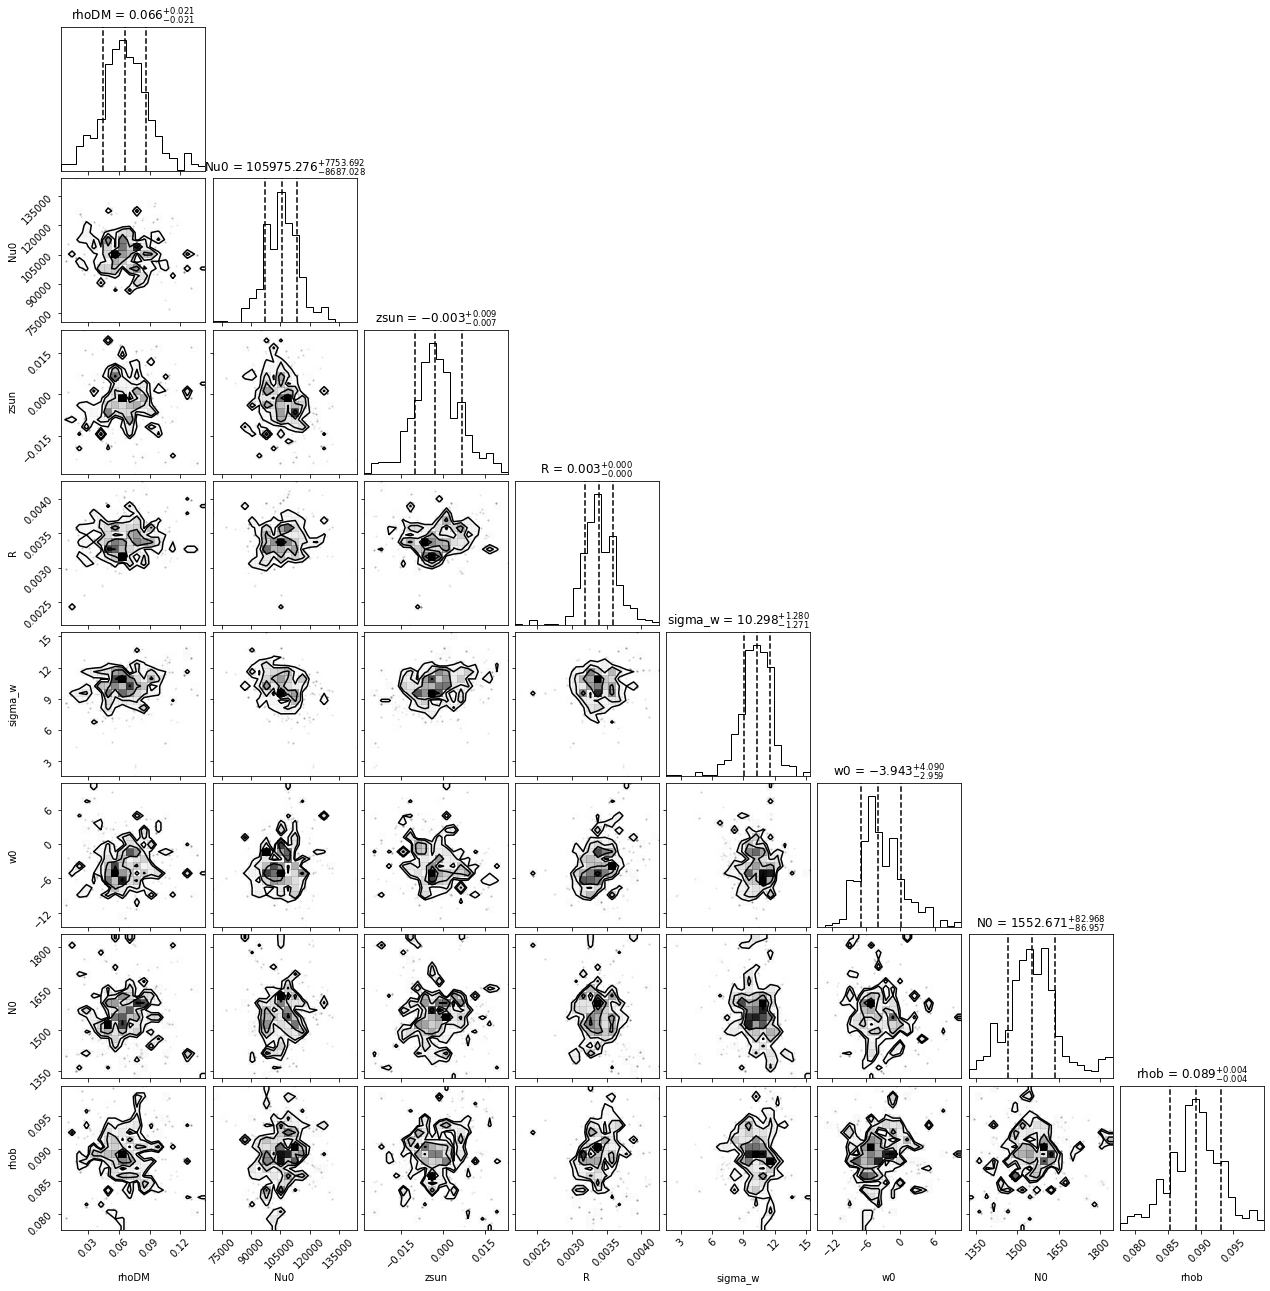

In [44]:
plot_corners(flat_samples_DM, pars, skip=0)

In [47]:
model = dict(
    rhoDM=flat_samples_DM[:, 0],
    Nu0=flat_samples_DM[:, 1],
    zsun=flat_samples_DM[:, 2],
    R=flat_samples_DM[:, 3],
    sigma_w=flat_samples_DM[:, 4],
    w0=flat_samples_DM[:, 5],
    N0=flat_samples_DM[:, 6],
)
total = len(flat_samples_DM[:, 0])

theta = dict(
    rhos=rhos[:, -1],
    sigmaz=sigmaz[:, -1],
    rhoDM=flat_samples_DM[-1, 0],
    sigmaDD=0,
    hDD=1,
    Nu0=flat_samples_DM[-1, 1],
    zsun=flat_samples_DM[-1, 2],
    R=flat_samples_DM[-1, 3],
    sigma_w=flat_samples_DM[-1, 4],
    w0=flat_samples_DM[-1, 5],
    N0=flat_samples_DM[-1, 6],
)

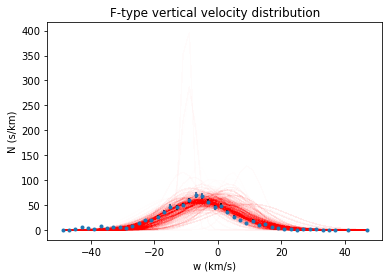

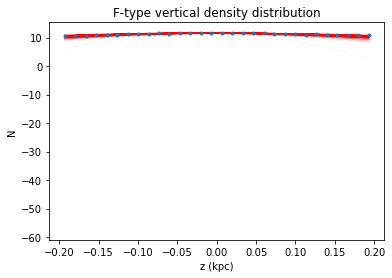

In [48]:
z, w = itemgetter('z','w')(data)

args = ('ws', 'wnum', 'werr')
ws, wnum, werr = itemgetter(*args)(w)

plt.figure()
plt.title("F-type vertical velocity distribution")
log_N = lambda x, t: t['N0']*norm.pdf(x, loc=t['w0'], scale=t['sigma_w'])

for i in range(2000):
    index = int(np.random.random()*total)
    for k, v in model.items():
        theta[k] = v[index]
    logN = log_N(ws, theta)
    plt.plot(ws, logN, c="red", alpha=0.002)
plt.errorbar(ws, wnum, yerr=werr, fmt='.')
plt.xlabel("w (km/s)")
plt.ylabel("N (s/km)")
plt.show()

args = ('zs', 'znum', 'zerr')
zs, znum, zerr = itemgetter(*args)(z)

logNu_ = lambda x, t: log_nu_mod(x, t)+np.log(compz(x))

plt.figure()
plt.title("F-type vertical density distribution")
for i in range(2000):
    index = int(np.random.random()*total)
    for k, v in model.items():
        if k in ["rhos", "sigmaz"]:
            theta[k] = v[:, index]
        else:
            theta[k] = v[index]
    logNu = log_nu_mod(zs, theta)
    plt.plot(zs, logNu, c="red", alpha=0.002)
plt.errorbar(zs, np.log(znum), yerr=[-np.log(1-zerr/znum), np.log(1+zerr/znum)], fmt='.')
plt.xlabel("z (kpc)")
plt.ylabel("N")
plt.show()

# No Dark Matter

In [49]:
df = vaex.open(join(data_dir_mcmc, "mcmc-F-tesno.hdf5"))
df['rhob'] = df.evaluate('rho1+rho2+rho3+rho4+rho5+rho6+rho7+rho8+rho9+rho10+rho11+rho12')
df = df.extract()
df

#,rho1,rho2,rho3,rho4,rho5,rho6,rho7,rho8,rho9,rho10,rho11,rho12,sigmaz1,sigmaz2,sigmaz3,sigmaz4,sigmaz5,sigmaz6,sigmaz7,sigmaz8,sigmaz9,sigmaz10,sigmaz11,sigmaz12,Nu0,zsun,R,sigma_w,w0,N0,walker,rhob
0,0.014310121774700955,0.031250544639644766,0.007286099294829027,0.0005163378362321995,0.0006473948713701972,0.001769772382087512,0.00165737174938197,0.003256223186266123,0.006825652689540386,0.01943771461177887,0.005909586209651549,0.0015428182785675012,3.8040338456485525,6.9166671881773985,23.235259623993294,41.51404855386244,14.101095862650718,5.844083085568333,10.115796432456898,15.197540959751818,17.735968505043278,13.81313871158823,17.311427412384337,15.703817708500676,92619.2338930766,0.00486550645936764,0.002537667579512965,11.348473623428772,-5.283866201920873,1661.7581734645637,0,0.09440963752405107
1,0.014310121774700955,0.031250544639644766,0.007286099294829027,0.0005163378362321995,0.0006473948713701972,0.001769772382087512,0.00165737174938197,0.003256223186266123,0.006825652689540386,0.01943771461177887,0.005909586209651549,0.0015428182785675012,3.8040338456485525,6.9166671881773985,23.235259623993294,41.51404855386244,14.101095862650718,5.844083085568333,10.115796432456898,15.197540959751818,17.735968505043278,13.81313871158823,17.311427412384337,15.703817708500676,92619.2338930766,0.00486550645936764,0.002537667579512965,11.348473623428772,-5.283866201920873,1661.7581734645637,0,0.09440963752405107
2,0.014310121774700955,0.031250544639644766,0.007286099294829027,0.0005163378362321995,0.0006473948713701972,0.001769772382087512,0.00165737174938197,0.003256223186266123,0.006825652689540386,0.01943771461177887,0.005909586209651549,0.0015428182785675012,3.8040338456485525,6.9166671881773985,23.235259623993294,41.51404855386244,14.101095862650718,5.844083085568333,10.115796432456898,15.197540959751818,17.735968505043278,13.81313871158823,17.311427412384337,15.703817708500676,92619.2338930766,0.00486550645936764,0.002537667579512965,11.348473623428772,-5.283866201920873,1661.7581734645637,0,0.09440963752405107
3,0.013902797957486718,0.031237968884601848,0.007279666751751815,0.0005139624395166847,0.0006431149866203675,0.001770459823821039,0.001673241125164717,0.003257535630796875,0.006950653146227899,0.019613688632541162,0.005810385828758883,0.00153708504207384,3.7894988453966105,6.941542405695051,22.97382488463804,41.235498636954034,14.388234370062714,5.9601725500121345,10.045401965039597,15.453403814512797,17.766347218264713,13.757866024751474,17.45630061622751,15.86686833134944,94223.5069251853,0.002791230141874079,0.0026358551448807765,10.87747290805597,-4.264046715409828,1653.358981538336,0,0.09419056024936184
4,0.013902797957486718,0.031237968884601848,0.007279666751751815,0.0005139624395166847,0.0006431149866203675,0.001770459823821039,0.001673241125164717,0.003257535630796875,0.006950653146227899,0.019613688632541162,0.005810385828758883,0.00153708504207384,3.7894988453966105,6.941542405695051,22.97382488463804,41.235498636954034,14.388234370062714,5.9601725500121345,10.045401965039597,15.453403814512797,17.766347218264713,13.757866024751474,17.45630061622751,15.86686833134944,94223.5069251853,0.002791230141874079,0.0026358551448807765,10.87747290805597,-4.264046715409828,1653.358981538336,0,0.09419056024936184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,0.007642728345204955,0.029665703343873442,0.007175412105403434,0.0004835622510865837,0.0005974635485826037,0.0017208787296059025,0.0017042670456470647,0.002908744826016121,0.007628914092430767,0.018989414994685747,0.0050597334219531715,0.0016029192775289963,3.749290917266962,6.708790688492672,20.980948241334946,39.515580402091835,15.284443682438315,8.478938977699707,12.58734722400757,18.104341799656616,17.768445941474216,18.27216704361367,22.813490692579553,17.55368837357943,96145.17228219725,0.0057653737006640796,0.0037556010999197417,8.222422553639861,2.005634544590334,16

In [50]:
walker = df.take([-1]).walker.to_numpy()[0]+1
walker

90

In [51]:
len(df)//walker

10

In [52]:
rhos = np.zeros((12, len(df)))
rhos[1] = df['rho2'].to_numpy()
rhos[2] = df['rho3'].to_numpy()
rhos[3] = df['rho4'].to_numpy()
rhos[4] = df['rho5'].to_numpy()
rhos[5] = df['rho6'].to_numpy()
rhos[6] = df['rho7'].to_numpy()
rhos[7] = df['rho8'].to_numpy()
rhos[8] = df['rho9'].to_numpy()
rhos[9] = df['rho10'].to_numpy()
rhos[10] = df['rho11'].to_numpy()
rhos[11] = df['rho12'].to_numpy()
rhos

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.03125054, 0.03125054, 0.03125054, ..., 0.02957674, 0.02957674,
        0.02957674],
       [0.0072861 , 0.0072861 , 0.0072861 , ..., 0.00718817, 0.00718817,
        0.00718817],
       ...,
       [0.01943771, 0.01943771, 0.01943771, ..., 0.01908605, 0.01908605,
        0.01908605],
       [0.00590959, 0.00590959, 0.00590959, ..., 0.00507889, 0.00507889,
        0.00507889],
       [0.00154282, 0.00154282, 0.00154282, ..., 0.00159691, 0.00159691,
        0.00159691]])

In [53]:
#sigmaz = np.zeros((len(df)//walker, walker, 12))
sigmaz = np.zeros((12, len(df)))
sigmaz[0] = df['sigmaz1'].to_numpy()
sigmaz[1] = df['sigmaz2'].to_numpy()
sigmaz[2] = df['sigmaz3'].to_numpy()
sigmaz[3] = df['sigmaz4'].to_numpy()
sigmaz[4] = df['sigmaz5'].to_numpy()
sigmaz[5] = df['sigmaz6'].to_numpy()
sigmaz[6] = df['sigmaz7'].to_numpy()
sigmaz[7] = df['sigmaz8'].to_numpy()
sigmaz[8] = df['sigmaz9'].to_numpy()
sigmaz[9] = df['sigmaz10'].to_numpy()
sigmaz[10] = df['sigmaz11'].to_numpy()
sigmaz[11] = df['sigmaz12'].to_numpy()
sigmaz

array([[ 3.80403385,  3.80403385,  3.80403385, ...,  3.74412598,
         3.74412598,  3.74412598],
       [ 6.91666719,  6.91666719,  6.91666719, ...,  6.72192605,
         6.72192605,  6.72192605],
       [23.23525962, 23.23525962, 23.23525962, ..., 21.05877653,
        21.05877653, 21.05877653],
       ...,
       [13.81313871, 13.81313871, 13.81313871, ..., 18.29157376,
        18.29157376, 18.29157376],
       [17.31142741, 17.31142741, 17.31142741, ..., 22.73183202,
        22.73183202, 22.73183202],
       [15.70381771, 15.70381771, 15.70381771, ..., 17.65852743,
        17.65852743, 17.65852743]])

In [54]:
chain = np.zeros((len(df)//walker, walker, 7))

pars = ["Nu0", 'zsun', 'R', 'sigma_w', 'w0', 'N0', 'rhob']
for j in range(walker):
    for i, key in enumerate(pars):
        chain[:, j, i] = df.filter(df.walker == j)[key].to_numpy()

flat_samples_no = chain.reshape(len(df),7)
flat_samples_no.shape

(900, 7)

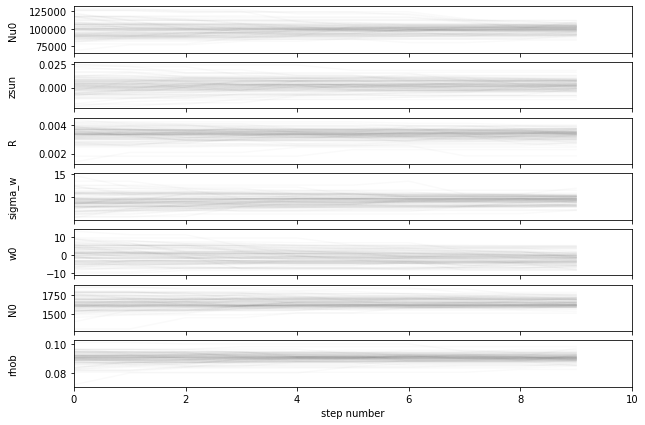

In [55]:
plot_chain(chain, pars, alpha=0.02)

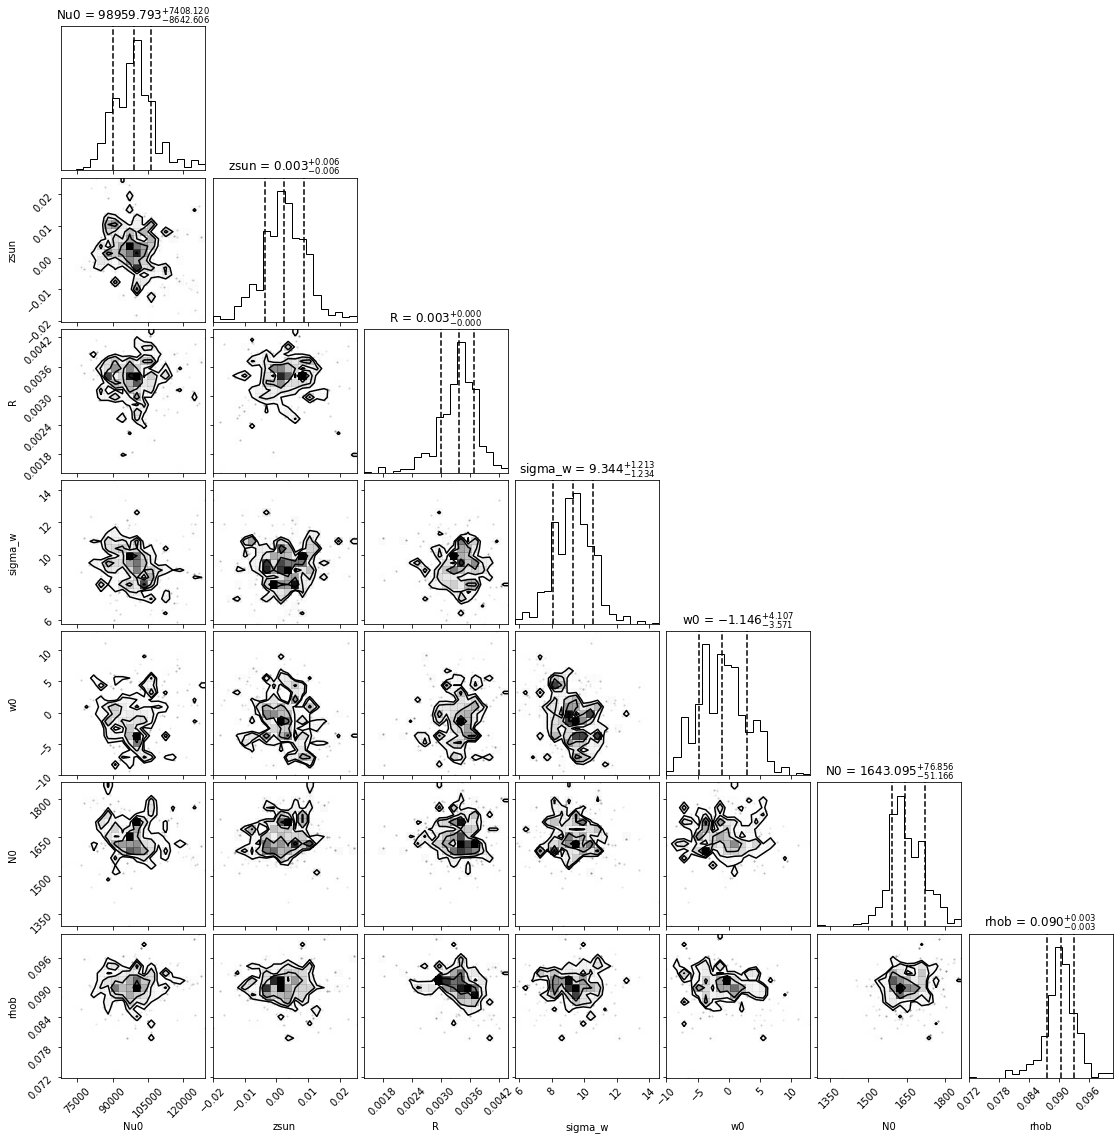

In [56]:
plot_corners(flat_samples_no, pars, skip=0)

In [57]:
model = dict(
    Nu0=flat_samples_no[:, 0],
    zsun=flat_samples_no[:, 1],
    R=flat_samples_no[:, 2],
    sigma_w=flat_samples_no[:, 3],
    w0=flat_samples_no[:, 4],
    N0=flat_samples_no[:, 5]
)
total = len(flat_samples_no[:, 0])

theta = dict(
    rhos=rhos[:, -1],
    sigmaz=sigmaz[:, -1],
    rhoDM=0,
    sigmaDD=0,
    hDD=1,
    Nu0=flat_samples_no[-1, 0],
    zsun=flat_samples_no[-1, 1],
    R=flat_samples_no[-1, 2],
    sigma_w=flat_samples_no[-1, 3],
    w0=flat_samples_no[-1, 4],
    N0=flat_samples_no[-1, 5]
)

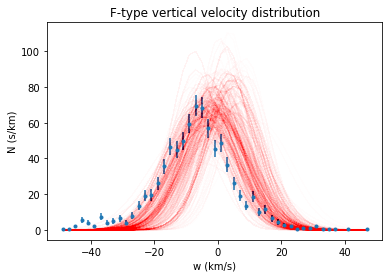

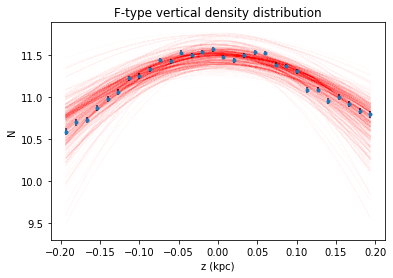

In [58]:
z, w = itemgetter('z','w')(data)

args = ('ws', 'wnum', 'werr')
ws, wnum, werr = itemgetter(*args)(w)

plt.figure()
plt.title("F-type vertical velocity distribution")
log_N = lambda x, t: t['N0']*norm.pdf(x, loc=t['w0'], scale=t['sigma_w'])

for i in range(2000):
    index = int(np.random.random()*total)
    for k, v in model.items():
        theta[k] = v[index]
    logN = log_N(ws, theta)
    plt.plot(ws, logN, c="red", alpha=0.002)
plt.errorbar(ws, wnum, yerr=werr, fmt='.')
plt.xlabel("w (km/s)")
plt.ylabel("N (s/km)")
plt.show()

args = ('zs', 'znum', 'zerr')
zs, znum, zerr = itemgetter(*args)(z)

logNu_ = lambda x, t: log_nu_mod(x, t)+np.log(compz(x))

plt.figure()
plt.title("F-type vertical density distribution")
for i in range(2000):
    index = int(np.random.random()*total)
    for k, v in model.items():
        if k in ["rhos", "sigmaz"]:
            theta[k] = v[:, index]
        else:
            theta[k] = v[index]
    logNu = log_nu_mod(zs, theta)
    plt.plot(zs, logNu, c="red", alpha=0.002)
plt.errorbar(zs, np.log(znum), yerr=[-np.log(1-zerr/znum), np.log(1+zerr/znum)], fmt='.')
plt.xlabel("z (kpc)")
plt.ylabel("N")
plt.show()